여러분은 왜 개 사료가 예상보다 빨리 상하게 되는지를 파악하기위해 개 사료 회사에 고용되었습니다. 안 좋은 소식은 이 회사는 한동안 장비를 업그레이드 하지 않았습니다. 즉, 이 회사에서 사용하는 5가지 방부제의 사용 용량이 중구난방이라는 뜻입니다. 하지만 그 중에서 가장 많은 영향을 끼치는 것이 무엇일까요?<br>
이 회사에서는 먼저 4가지 방부제(A, B, C, D)가 함유된 방부제 묶음을 섞은 뒤 '필러'라는 화학물질로 마무리합니다. 식품과학자들은 A, B, C, D 방부제 중 하나가 문제를 일으키고 있다고 생각하지만, 그게 어떤 것인지 명확하게 하기위해 여러분이 고용됐습니다. "랜덤포레스트"로 어떤 방부제가 사료를 빨리 상하게 하는지 찾아보세요!

- Pres_A : 혼합물의 A비율
- Pres_B : 혼합물의 B비율
- Pres_C : 혼합물의 C비율
- Pres_D : 혼합물의 D비율
- Spoiled : 개 사료가 상했는지 여부를 나타내는 레이블.

**시나리오에서 요구하는 바를 고려하여, 머신러닝을 이용해서 문제를 풀어보세요.**

In [13]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import uniform, randint
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 윈도우용 한글깨짐 방지
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [4]:
df = pd.read_csv("./data/dog_food.csv")

In [4]:
df.head()

,A,B,C,D,Spoiled
0,4,2,12.0,3,1.0
1,5,6,12.0,7,1.0
2,6,2,13.0,6,1.0
3,4,2,12.0,1,1.0
4,4,2,12.0,3,1.0


# 데이터 확인

In [5]:
df.shape

(490, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A        490 non-null    int64  
 1   B        490 non-null    int64  
 2   C        490 non-null    float64
 3   D        490 non-null    int64  
 4   Spoiled  490 non-null    float64
dtypes: float64(2), int64(3)
memory usage: 19.3 KB


In [7]:
df.isna().sum()

A          0
B          0
C          0
D          0
Spoiled    0
dtype: int64

- 모든 컬럼에 결측치는 없음

In [8]:
df.dtypes

A            int64
B            int64
C          float64
D            int64
Spoiled    float64
dtype: object

In [9]:
df.describe()

,A,B,C,D,Spoiled
count,490.000000,490.000000,490.000000,490.000000,490.000000
mean,5.534694,5.504082,9.126531,5.579592,0.285714
std,2.951520,2.853797,2.055545,2.854837,0.452216
min,1.000000,1.000000,5.000000,1.000000,0.000000
25%,3.000000,3.000000,8.000000,3.000000,0.000000
50%,5.000000,6.000000,9.000000,6.000000,0.000000
75%,8.000000,8.000000,11.000000,8.000000,1.000000
max,10.000000,10.000000,14.000000,10.000000,1.000000


#### float 컬럼 value_counts 확인해보기

In [10]:
df["C"].value_counts()

C
8.0     134
9.0      90
7.0      70
12.0     61
11.0     41
10.0     29
6.0      29
13.0     24
14.0      9
5.0       3
Name: count, dtype: int64

In [11]:
df["Spoiled"].value_counts()

Spoiled
0.0    350
1.0    140
Name: count, dtype: int64

- 소수점 아래는 '0'이므로 int로 변환하지 않음

In [12]:
# 중복값 확인해 보기
df[df.duplicated()]

,A,B,C,D,Spoiled
4,4,2,12.0,3,1.0
73,10,6,12.0,10,1.0
197,8,10,8.0,3,0.0
273,10,9,8.0,2,0.0
305,4,5,9.0,8,0.0
308,3,6,8.0,3,0.0
356,2,5,8.0,3,0.0
394,2,1,8.0,9,0.0
403,10,1,7.0,4,0.0
407,5,7,8.0,9,0.0


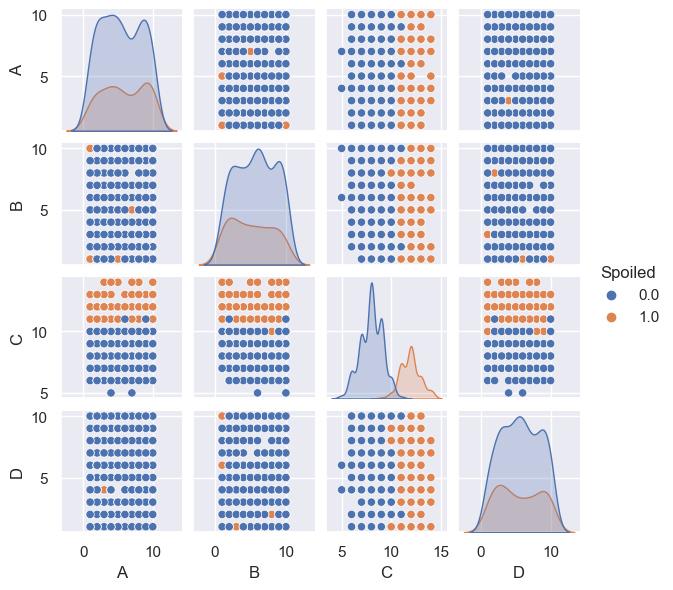

In [57]:
sns.set(style = "darkgrid")
sns.pairplot(df,height=1.5, hue = "Spoiled")
plt.show()

- C 사료가 심상치 않음(...)

#### 이상치 시각화

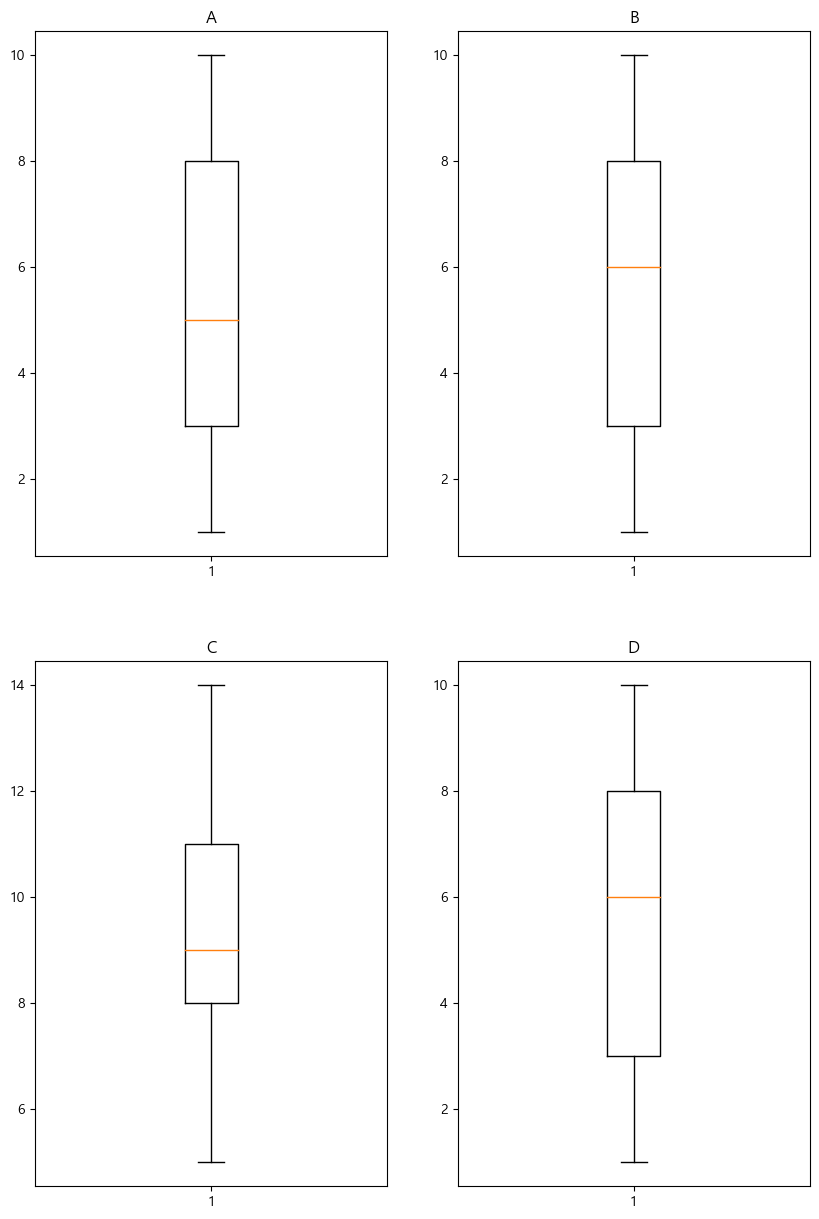

In [6]:
# 그래프 객체 생성 
fig = plt.figure(figsize = (10, 15))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)


# axe 객체에 boxplot 메서드로 그래프 출력
ax1.boxplot(x = [df["A"]])
ax2.boxplot(x = [df["B"]])
ax3.boxplot(x = [df["C"]])
ax4.boxplot(x = df["D"])

ax1.set_title("A")
ax2.set_title("B")
ax3.set_title("C")
ax4.set_title("D")

plt.show()

#### 시각화

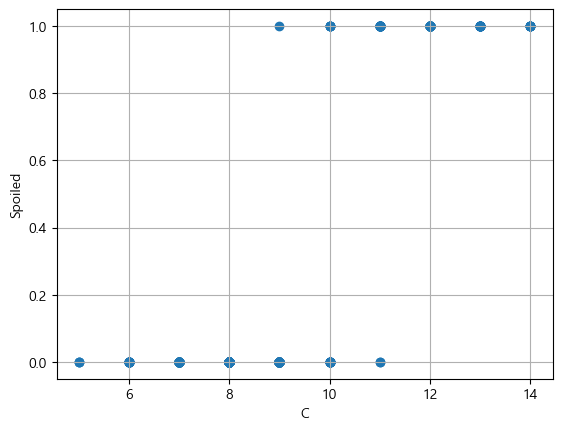

In [7]:
plt.figure()

plt.scatter(df["C"], df["Spoiled"])
plt.xlabel("C")
plt.ylabel("Spoiled")
plt.grid(True)
plt.show()

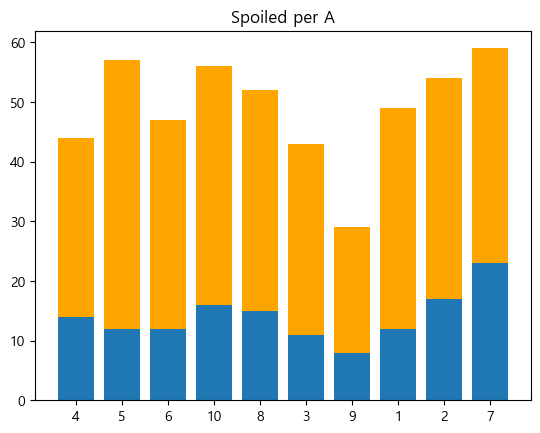

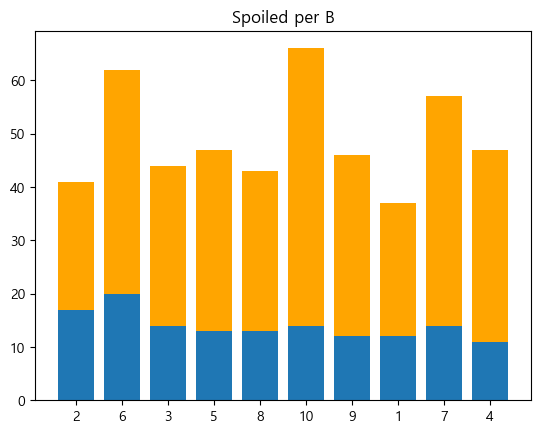

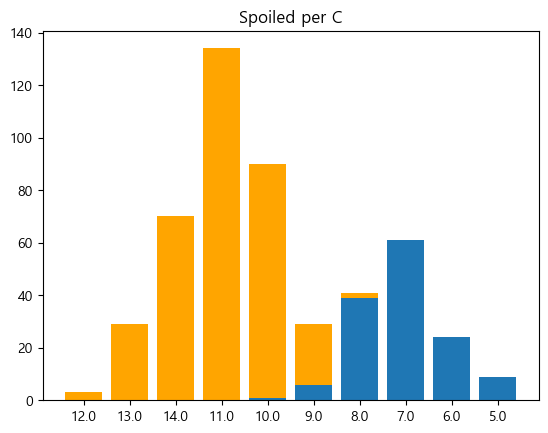

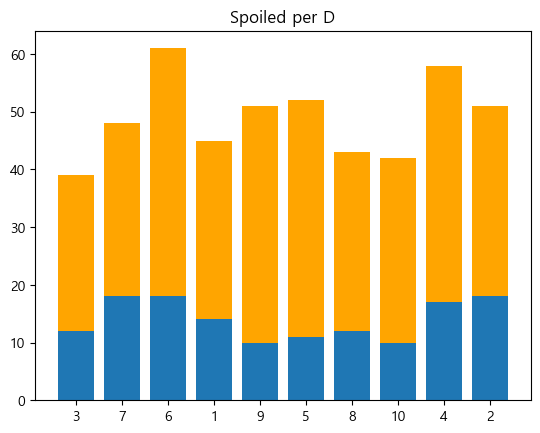

In [9]:
for i in df.columns[:-1]:
    plt.bar(np.arange(len(df[i].unique())), df[i].value_counts().sort_index(), color = "orange")
    plt.bar(np.arange(len(df[i].unique())), df.groupby(i)["Spoiled"].sum().values)
    plt.xticks(np.arange(len(df[i].unique())), df[i].unique())
    plt.title(f"Spoiled per {i}")
    plt.show()

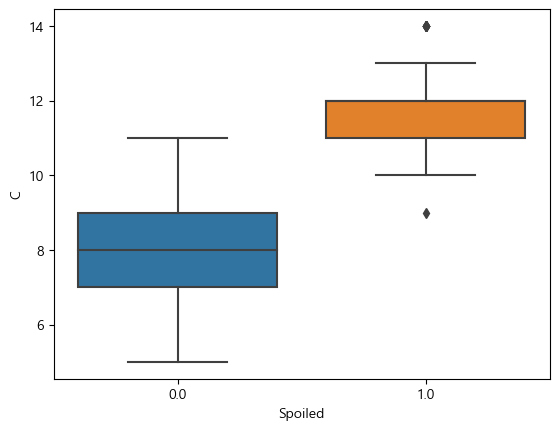

In [10]:
plt.figure()
sns.boxplot(x = "Spoiled", y = "C", data = df)
plt.show()

#### 상관계수 시각화

In [14]:
df_corr = df.corr()
df_corr

,A,B,C,D,Spoiled
A,1.000000,0.007267,0.057588,-0.045834,0.059973
B,0.007267,1.000000,-0.117222,-0.036436,-0.086474
C,0.057588,-0.117222,1.000000,-0.034477,0.858620
D,-0.045834,-0.036436,-0.034477,1.000000,-0.016067
Spoiled,0.059973,-0.086474,0.858620,-0.016067,1.000000


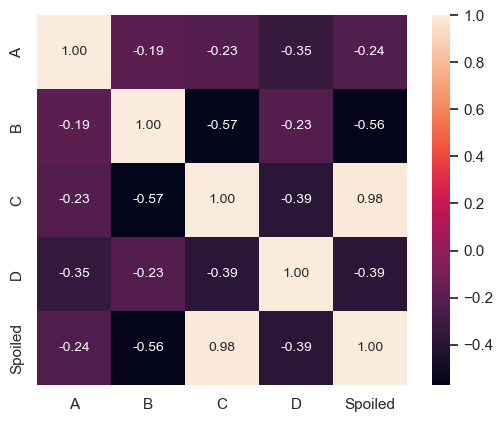

In [15]:
corr_mat = np.corrcoef(df_corr.values.T)
sns.set()
full_mat = sns.heatmap(corr_mat, cbar = True, annot = True, square = True, fmt = ".2f",
                      annot_kws = {"size" : 10}, yticklabels = df_corr,
                      xticklabels = df_corr)
plt.show()

- C가 가장 Spolied와 연관이 크다고 생각
    - 하지만 A, B, C, D 모두 영향을 줄 수 있으므로, 아직 제외하지 않겠음

## 중복값 제거

In [16]:
df.drop_duplicates(subset=None, inplace=True,ignore_index=True)

In [17]:
df.head()

,A,B,C,D,Spoiled
0,4,2,12.0,3,1.0
1,5,6,12.0,7,1.0
2,6,2,13.0,6,1.0
3,4,2,12.0,1,1.0
4,10,3,13.0,9,1.0


- RandomForest 만 했을 경우
- GridSearch 를 같이 실행한 경우
- RandomSearch 를 같이 실행한 경우
- GradientBoosting 을 했을 경우
- ExtraTree 를 했을 경우
- DecisionTree 를 했을 경우

# 통계 분석

In [14]:
# 통계 분석
# 분산의 동일성 검정
# 두 집단의 분산이 같다(등분산성)
stats.barlett(df.loc[df["Spoiled"] == 1, "C"], df.loc[df["Spoiled"] == 0, "C"])

AttributeError: module 'scipy.stats' has no attribute 'barlett'

In [ ]:
# t-test
# 두 집단의 평균이 다르다
stats.ttest_ind(df.loc[df["Spoiled"] == 1, "C"],
              df.loc[df["Spoiled"] == 0, "C"], equal_var = True)

## 데이터

In [18]:
x = df.drop("Spoiled",axis=1)
y = df["Spoiled"]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, stratify = y, 
                                                 random_state = 4)

In [20]:
x_train.shape, x_test.shape

((353, 4), (118, 4))

In [21]:
ss = StandardScaler()
scaled_train = ss.fit_transform(x_train)
scaled_test = ss.transform(x_test)

In [23]:
lr = LogisticRegression()
lr.fit(scaled_train, y_train)
print(lr.score(scaled_train, y_train))
print(lr.score(scaled_test, y_test))

0.9773371104815864
0.9915254237288136


In [25]:
lr.coef_, lr.intercept_

(array([[-0.01771192, -0.05832049,  4.74637106, -0.17260955]]),
 array([-2.74582871]))

# RandomForest

## 모델 훈련

In [26]:
rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=4)

In [27]:
rf.score(x_train, y_train)

0.9971671388101983

In [28]:
rf.score(x_test, y_test)

0.9830508474576272

In [29]:
rf.predict(x_test)

array([0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.])

In [30]:
rf.predict_proba(x_test)[:10]

array([[0.98, 0.02],
       [0.99, 0.01],
       [0.01, 0.99],
       [0.06, 0.94],
       [0.04, 0.96],
       [0.97, 0.03],
       [0.97, 0.03],
       [1.  , 0.  ],
       [0.09, 0.91],
       [0.03, 0.97]])

In [31]:
rf.feature_importances_

array([0.03912573, 0.03407412, 0.88718146, 0.0396187 ])

In [32]:
# 변수 중요도 시각화
def plot_feature_importances(model):
    n_features = x.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align="center")
    plt.yticks(np.arange(n_features),x.columns)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1,n_features)
    plt.show()

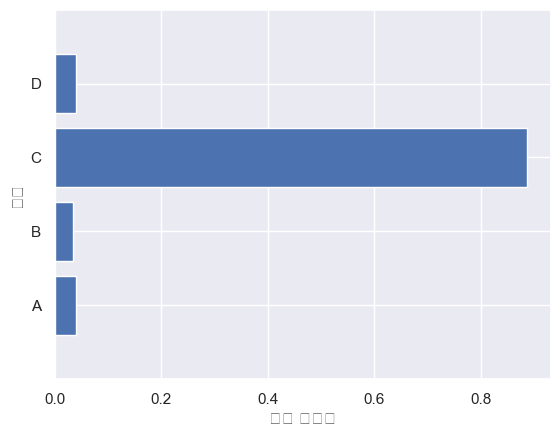

In [59]:
plot_feature_importances(rf)

#### RandomForest는 C가 빨리 상하는 것으로 생각됨

# GridSearch

## 모델 훈련

In [34]:
params = {"min_impurity_decrease": np.arange(0.0001,0.001,0.0001),
          "min_samples_split":range(2,100,10), "max_depth" : [10,20,30],
          "n_estimators" : [100,200,300]}

In [35]:
rf_grid = RandomForestClassifier(random_state = 4)
gs = GridSearchCV(rf_grid,params, n_jobs = -1, cv = 5)

In [36]:
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=4), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_impurity_decrease': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'min_samples_split': range(2, 100, 10),
                         'n_estimators': [100, 200, 300]})

In [37]:
gs.best_params_

{'max_depth': 10,
 'min_impurity_decrease': 0.0001,
 'min_samples_split': 12,
 'n_estimators': 100}

In [38]:
gs.best_score_

0.9773038229376259

In [40]:
# 최적화 모델 추출
gs_model = gs.best_estimator_
print(gs_model.score(x_train, y_train))
print(gs_model.score(x_test, y_test))

0.9773371104815864
0.9915254237288136


In [41]:
gs_model.predict(x_test)

array([0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.])

In [42]:
gs_model.predict_proba(x_test)[:10]

array([[0.96913772, 0.03086228],
       [0.92541772, 0.07458228],
       [0.02865383, 0.97134617],
       [0.14465869, 0.85534131],
       [0.06400694, 0.93599306],
       [0.94813297, 0.05186703],
       [0.94504817, 0.05495183],
       [0.98984664, 0.01015336],
       [0.08628941, 0.91371059],
       [0.04517677, 0.95482323]])

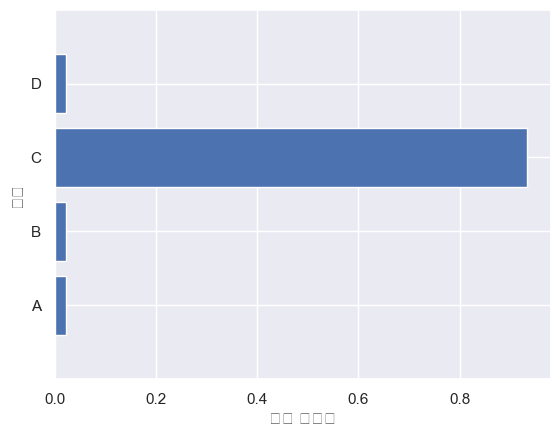

In [60]:
# 변수 중요도 시각화
plot_feature_importances(gs_model)

#### GridSearch 또한 C가 빨리 상하는 것으로 생각됨

# RandomSearch

## 모델 훈련

In [44]:
r_rf = RandomForestClassifier(random_state = 4)

In [45]:
params = {"min_impurity_decrease" : uniform(0.0001,0.001),
         "max_depth" : randint(10,50),
         "n_estimators" : randint(100,300),
         "min_samples_split" : randint(2,25),
        "min_samples_leaf" : randint(1,25)}

In [46]:
rs = RandomizedSearchCV(r_rf, params, n_jobs = -1, n_iter = 200, random_state = 4 , cv = 5)

In [47]:
rs.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=4),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001939A9DCB90>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001939A9E6B50>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019396353C90>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000019396350090>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000193960F1450>},
                   random_state=4)

In [48]:
rs.best_params_

{'max_depth': 15,
 'min_impurity_decrease': 0.0010726843599648843,
 'min_samples_leaf': 24,
 'min_samples_split': 10,
 'n_estimators': 150}

In [49]:
rs_model = rs.best_estimator_
print(rs_model.score(x_train, y_train))
print(rs_model.score(x_test, y_test))

0.9773371104815864
0.9915254237288136


In [50]:
rs.best_score_

0.9773038229376259

In [51]:
rs.predict(x_test)

array([0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0.])

In [52]:
rs.predict_proba(x_test)[:10]

array([[0.86790158, 0.13209842],
       [0.85886161, 0.14113839],
       [0.16714107, 0.83285893],
       [0.16715315, 0.83284685],
       [0.16865849, 0.83134151],
       [0.85743956, 0.14256044],
       [0.87678258, 0.12321742],
       [0.90568283, 0.09431717],
       [0.12873652, 0.87126348],
       [0.16515781, 0.83484219]])

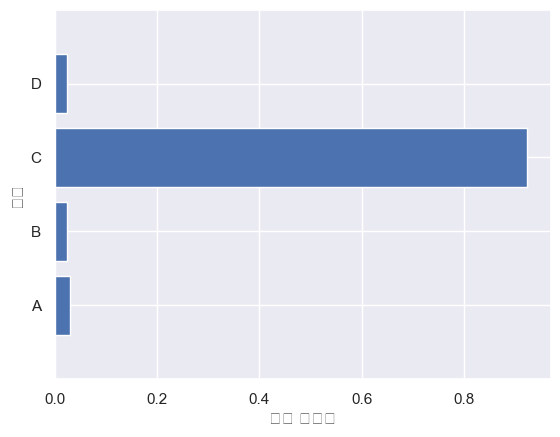

In [61]:
# 변수 중요도 시각화
plot_feature_importances(rs_model)

#### RandomSearch 또한 C가 가장 큰 영향을 줌

# Gradient Boosting

## 모델 훈련

In [62]:
gb = GradientBoostingClassifier(random_state = 4, n_estimators = 500, learning_rate = 0.2)
scores = cross_validate(gb, x_train, y_train, return_train_score = True, n_jobs = -1)

In [63]:
print(np.mean(scores["train_score"]), np.mean(scores["test_score"]))

0.9978748465027693 0.9574245472837022


In [64]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, n_estimators=500, random_state=4)

In [65]:
# 그레디언트 부스팅 특성 중요도
gb_model = gb.feature_importances_
gb_model

array([0.00608064, 0.00774372, 0.95700734, 0.02916829])

- "A", "B", "C", "D"
- C 사료의 중요도가 가장 높은 것을 볼 수 있음 

# ExtraTree

## 모델 훈련

In [66]:
et = ExtraTreesClassifier(n_jobs = -1, random_state = 4)
scores = cross_validate(et, x_train, y_train, return_train_score = True, n_jobs = -1)

In [67]:
print(np.mean(scores["train_score"]), np.mean(scores["test_score"]))

0.9978748465027693 0.9574647887323945


In [68]:
# 엑스트라 트리 특성 중요도
et.fit(x_train, y_train)
print(et.feature_importances_)

[0.04582641 0.04332447 0.8546322  0.05621692]


- "A", "B", "C", "D"
- C 사료의 중요도가 가장 높은 것을 볼 수 있음 

# DecisionTree

In [69]:
dt = DecisionTreeClassifier(random_state = 4)
dt.fit(scaled_train, y_train)
print(dt.score(scaled_train, y_train))
print(dt.score(scaled_test, y_test))

0.9971671388101983
0.9830508474576272


## 시각화

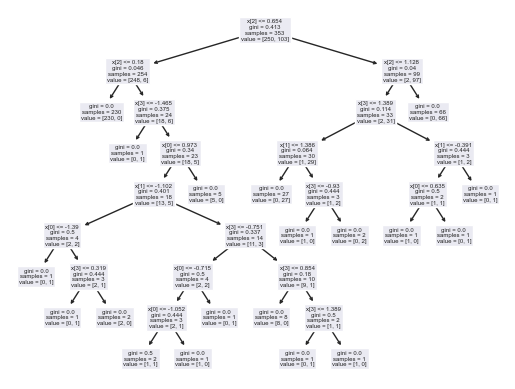

In [70]:
plt.figure()
plot_tree(dt)
plt.show()

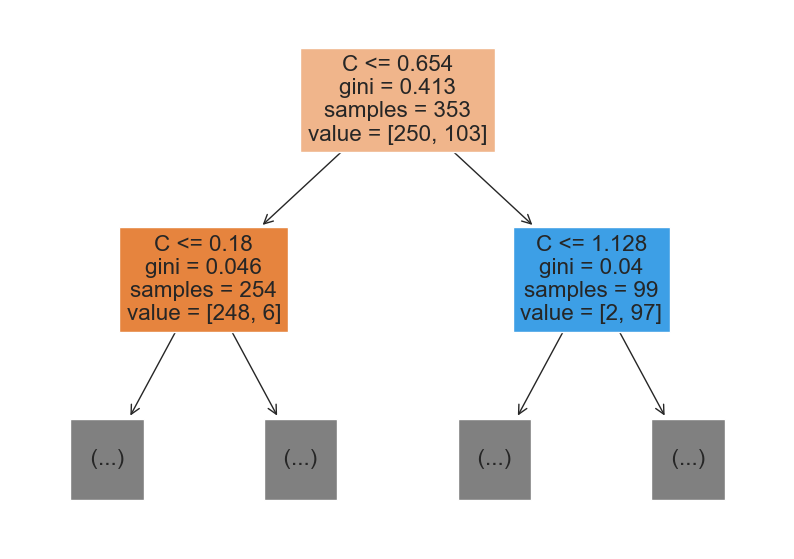

In [71]:
plt.figure(figsize = (10,7))
plot_tree(dt, max_depth = 1, filled = True, feature_names = ["A", "B", "C", "D"])
plt.show()

In [72]:
# 지니 불순도
1 - ((250 / 353)**2 + (103 / 353)**2)

0.41329277981526213

### 가지치기

In [73]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 11)
dt.fit(scaled_train, y_train)
print(dt.score(scaled_train, y_train))
print(dt.score(scaled_test, y_test))

0.9801699716713881
0.9915254237288136


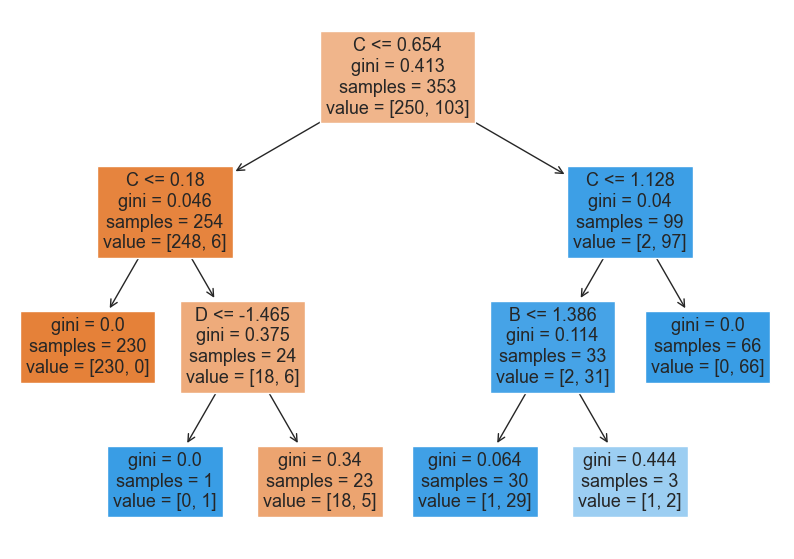

In [74]:
plt.figure(figsize = (10, 7))
plot_tree(dt, filled = True, feature_names = ["A", "B", "C", "D"])
plt.show()

In [75]:
dt = DecisionTreeClassifier(max_depth = 3, random_state = 4)
dt.fit(x_train, y_train)
print(dt.score(x_train, y_train))
print(dt.score(x_test, y_test))

0.9801699716713881
0.9915254237288136


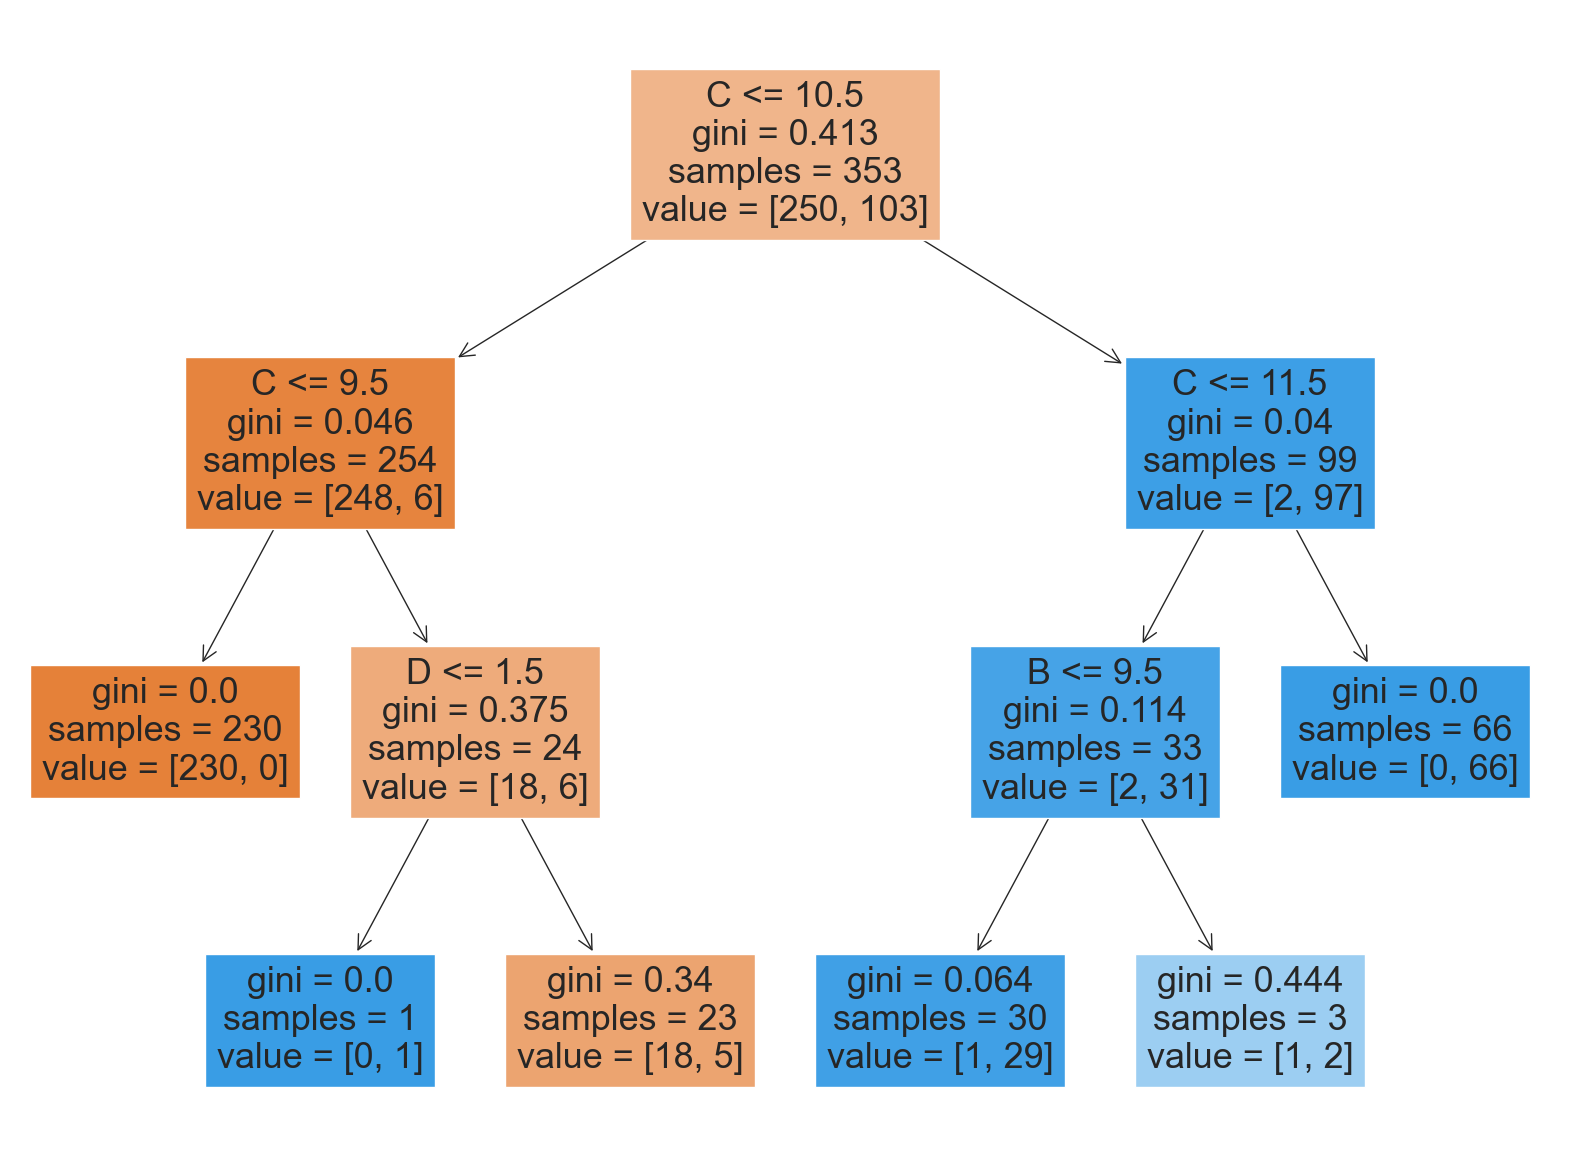

In [76]:
plt.figure(figsize = (20, 15))
plot_tree(dt, filled = True, feature_names = ["A", "B", "C", "D"])
plt.show()

In [77]:
print(dt.feature_importances_)

[0.         0.00364177 0.98764965 0.00870858]


- "A", "B", "C", "D"
- C 사료의 중요도가 가장 높은 것을 볼 수 있음 

# SVM_SVC

In [116]:
# 정규화 작업
mm = MinMaxScaler()
mm.fit(x_train)
x_train = mm.transform(x_train)

In [78]:
clf = SVC(C = 10, kernel='linear', random_state = 4) # SVC 클래스 생성
clf.fit(x_train, y_train) ## 모형 학습

SVC(C=10, kernel='linear', random_state=4)

In [79]:
## 파라미터 추정치print('가중치 :', clf.coef_) # 가중치는 kernel = 'linear'인 경우만 존재
print('절편항 :', clf.intercept_)
print('학습 정확도 :', np.mean(y_train == clf.predict(x_train)))

절편항 : [-20.99880164]
학습 정확도 : 0.9773371104815864


In [84]:
kernel_list = ['rbf', 'poly', 'sigmoid']

for kernel in kernel_list:
    clf = SVC(C = 10, kernel = kernel, random_state = 4) # SVC 클래스 생성    
    clf.fit(x_train, y_train) ## 모형 학습     

## 파라미터 추정치    
print('커널 :', kernel)    
print('절편항 :', clf.intercept_)    
print('학습 정확도 :', np.mean(y_train == clf.predict(x_train)))

커널 : sigmoid
절편항 : [-4.93189669]
학습 정확도 : 0.47592067988668557


In [117]:
# SVM 모델 생성
model = SVC(kernel='sigmoid', C = 10, degree = 4)
model.fit(x_train, y_train)

SVC(C=10, degree=4, kernel='sigmoid')

In [119]:
# test 데이터셋도 정규화(train 데이터셋 기준으로 학습시킨 정규화 모듈 사용)
scaled_test = mm.transform(x_test)

y_pred = model.predict(x_test) # 예측 라벨
accuracy_score(y_test, y_pred)

0.7033898305084746

## SVC 시각화

In [121]:
# SVM 결과로 시각화(PCA 2차원 축소 후 결과 확인)
pca = PCA(n_components=2)

In [122]:
# test 데이터셋 기준 시각화 진행
pca_test = pca.fit_transform(scaled_test)
y_find = y_test.reset_index(drop = True)

In [124]:
# target 마다 index 가져오기(종류마다 색깔을 다르게 시각화 목적) : 실제 라벨 기준
index_0 = y_find[y_find == 0].index
index_1 = y_find[y_find == 1].index
index_2 = y_find[y_find == 2].index
index_3 = y_find[y_find == 3].index

In [129]:
# target 마다 index 가져오기(종류마다 색깔을 다르게 시각화 목적) : 예측 라벨 기준
y_pred_Series = pd.Series(y_pred)
index_0_p = y_pred_Series[y_pred_Series == 0].index
index_1_p = y_pred_Series[y_pred_Series == 1].index
index_2_p = y_pred_Series[y_pred_Series == 2].index
index_3_p = y_pred_Series[y_pred_Series == 3].index

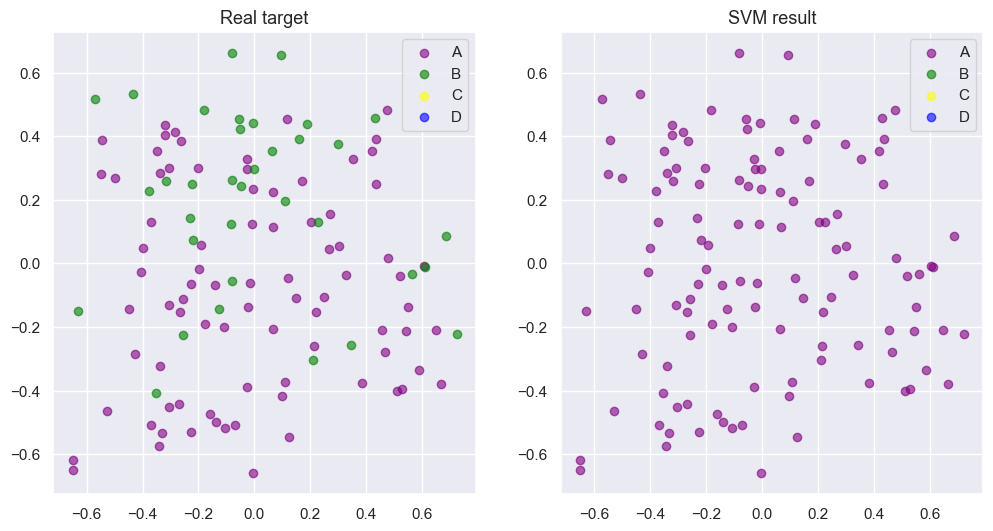

In [130]:
# 시각화
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.scatter(pca_test[index_0, 0], pca_test[index_0, 1], color = 'purple', alpha = 0.6, label = 'A')
plt.scatter(pca_test[index_1, 0], pca_test[index_1, 1], color = 'green', alpha = 0.6, label = 'B')
plt.scatter(pca_test[index_2, 0], pca_test[index_2, 1], color = 'yellow', alpha = 0.6, label = 'C')
plt.scatter(pca_test[index_3, 0], pca_test[index_3, 1], color = 'blue', alpha = 0.6, label = 'D')
plt.title('Real target', size = 13)
plt.title('Real target', size = 13)
plt.legend()

plt.subplot(122)
plt.scatter(pca_test[index_0_p, 0], pca_test[index_0_p, 1], color = 'purple', alpha = 0.6, label = 'A')
plt.scatter(pca_test[index_1_p, 0], pca_test[index_1_p, 1], color = 'green', alpha = 0.6, label = 'B')
plt.scatter(pca_test[index_2_p, 0], pca_test[index_2_p, 1], color = 'yellow', alpha = 0.6, label = 'C')
plt.scatter(pca_test[index_3_p, 0], pca_test[index_3_p, 1], color = 'blue', alpha = 0.6, label = 'D')
plt.title('SVM result', size = 13)
plt.legend()
plt.show()

# 정리

- 모두 C가 가장 큰 영향을 준걸로 판단되어짐 따라서 C가 사료를 가장 빨리 상하게 한다고 예상되어짐